In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#dataset reading
dts = pd.read_csv("insurance_pre.csv")

In [3]:
dts

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [4]:
dts.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

In [5]:
dts = pd.get_dummies(dts,drop_first=True)

In [6]:
dts

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [7]:
#columns rename-ing
dts.rename(columns={"sex_male":"sex","smoker_yes":"smoker"},inplace=True)

In [8]:
dts

,age,bmi,children,charges,sex,smoker
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [9]:
#separate the input and output values
feature = dts[["age","bmi","children","sex","smoker"]]
target = dts[["charges"]]

In [10]:
feature,target

(      age     bmi  children  sex  smoker
 0      19  27.900         0    0       1
 1      18  33.770         1    1       0
 2      28  33.000         3    1       0
 3      33  22.705         0    1       0
 4      32  28.880         0    1       0
 ...   ...     ...       ...  ...     ...
 1333   50  30.970         3    1       0
 1334   18  31.920         0    0       0
 1335   18  36.850         0    0       0
 1336   21  25.800         0    0       0
 1337   61  29.070         0    0       1
 
 [1338 rows x 5 columns],
           charges
 0     16884.92400
 1      1725.55230
 2      4449.46200
 3     21984.47061
 4      3866.85520
 ...           ...
 1333  10600.54830
 1334   2205.98080
 1335   1629.83350
 1336   2007.94500
 1337  29141.36030
 
 [1338 rows x 1 columns])

In [11]:
#splitting the train & test sets.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test = train_test_split(feature,target,test_size=0.33,random_state=0)

In [12]:
X_train, X_test

(      age     bmi  children  sex  smoker
 1271   25  34.485         0    0       0
 1313   19  34.700         2    0       1
 2      28  33.000         3    1       0
 405    52  38.380         2    0       0
 482    18  31.350         0    0       0
 ...   ...     ...       ...  ...     ...
 763    27  26.030         0    1       0
 835    42  35.970         2    1       0
 1216   40  25.080         0    1       0
 559    19  35.530         0    1       0
 684    33  18.500         1    0       0
 
 [896 rows x 5 columns],
       age     bmi  children  sex  smoker
 578    52  30.200         1    1       0
 610    47  29.370         1    0       0
 569    48  40.565         2    1       1
 1034   61  38.380         0    1       0
 198    51  18.050         0    0       0
 ...   ...     ...       ...  ...     ...
 117    29  27.940         1    0       1
 520    50  27.360         0    0       0
 422    40  32.775         1    1       1
 294    25  26.800         3    1       0
 261   

In [13]:
Y_train, Y_test

(          charges
 1271   3021.80915
 1313  36397.57600
 2      4449.46200
 405   11396.90020
 482    1622.18850
 ...           ...
 763    3070.80870
 835    7160.33030
 1216   5415.66120
 559    1646.42970
 684    4766.02200
 
 [896 rows x 1 columns],
           charges
 578    9724.53000
 610    8547.69130
 569   45702.02235
 1034  12950.07120
 198    9644.25250
 ...           ...
 117   19107.77960
 520   25656.57526
 422   39125.33225
 294    3906.12700
 261   17085.26760
 
 [442 rows x 1 columns])

In [14]:
from sklearn.tree import DecisionTreeRegressor
model1_create = DecisionTreeRegressor(max_depth=4)
model1_create = model1_create.fit(X_train,Y_train)

In [15]:
from sklearn.ensemble import AdaBoostRegressor
model2_create = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=5,random_state=0)
model2_create = model2_create.fit(X_train,Y_train)

/home/had/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
Y_pred1 = model1_create.predict(X_test)
Y_pred2 =  model2_create.predict(X_test)

In [17]:
Y_pred1

array([12850.54872289, 10818.23611952, 42464.16915231, 15586.9449375 ,
       10818.23611952,  5477.17054729,  3464.31915448,  9095.76384733,
        7209.7430375 ,  7209.7430375 ,  7209.7430375 , 10818.23611952,
       10818.23611952,  5477.17054729, 19519.30630211, 10818.23611952,
       15586.9449375 ,  3464.31915448,  7209.7430375 , 35256.48865682,
       23654.22130545, 12850.54872289, 12850.54872289, 27422.03897471,
        3464.31915448,  7209.7430375 ,  5477.17054729,  7209.7430375 ,
        5477.17054729, 10818.23611952,  7209.7430375 , 47559.39532286,
       15586.9449375 , 12850.54872289, 19519.30630211,  5477.17054729,
        9095.76384733, 35256.48865682, 42464.16915231,  3464.31915448,
        5477.17054729,  5477.17054729, 19519.30630211, 47559.39532286,
       35256.48865682,  3464.31915448, 10818.23611952,  7209.7430375 ,
        7209.7430375 , 12850.54872289,  3464.31915448,  3464.31915448,
       27422.03897471, 47559.39532286, 12850.54872289,  5477.17054729,
      

In [18]:
Y_pred2

array([16573.02923571, 13253.41122107, 46242.20306727, 13970.53992774,
       11062.43561733,  7883.4734766 ,  4103.86283137, 16573.02923571,
        7883.4734766 ,  6760.94798699,  7883.4734766 , 16573.02923571,
       11850.51674193,  7883.4734766 , 21439.92996857, 16573.02923571,
       16919.35203342,  6362.24940312,  7883.4734766 , 36652.72496923,
       23267.4559125 , 16573.02923571, 13542.05507032, 28429.59302   ,
        3850.84968086,  6760.94798699,  6760.94798699,  7883.4734766 ,
        6760.94798699, 13253.41122107,  7883.4734766 , 47646.99300265,
       16573.02923571, 13542.05507032, 18078.8105425 ,  6760.94798699,
       10578.154406  , 36861.73715435, 41805.29938917,  3850.84968086,
        7883.4734766 ,  6760.94798699, 18078.8105425 , 47646.99300265,
       36861.73715435,  5222.34017406, 16573.02923571,  7883.4734766 ,
        6760.94798699, 16573.02923571,  3850.84968086,  5222.34017406,
       25586.93734156, 46242.20306727, 13542.05507032,  6760.94798699,
      

In [19]:
from sklearn.metrics import r2_score
rscore1 = r2_score(Y_test,Y_pred1)
rscore2= r2_score(Y_test,Y_pred2)

In [20]:
rscore1

0.8815862480493728

In [21]:
#model1
rscore2

0.86762092026342

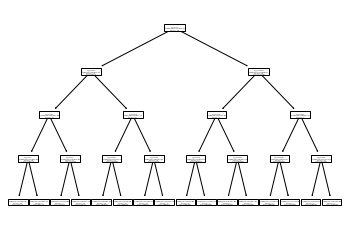

In [22]:
from sklearn import tree
tree.plot_tree(model1_create)
plt.show()